Identity Churn Index (Updates ÷ Enrolments)

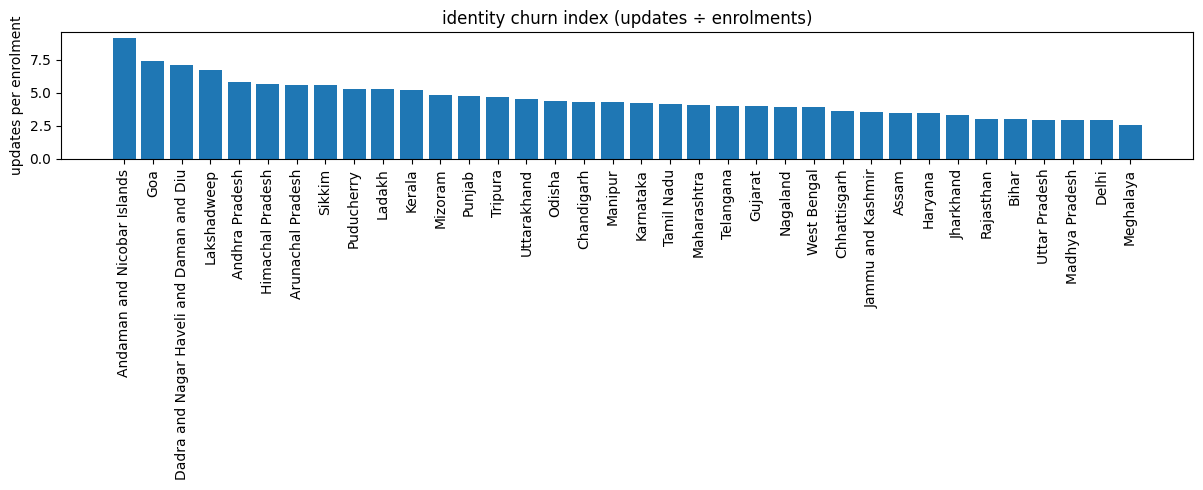

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


enrolment_df=pd.read_parquet("../sql/data/data_cache/enrolment_clean.parquet")
enrolments=enrolment_df.groupby("state").size().reset_index(name="enrolments")


demo=pd.read_parquet("../sql/data/data_cache/demographic_clean.parquet")
bio=pd.read_parquet("../sql/data/data_cache/biometric_clean.parquet")

updates=(
    pd.concat([demo,bio])
    .groupby("state")
    .size()
    .reset_index(name="updates")
)


df=enrolments.merge(updates,on="state",how="inner")

# churn index
df["identity_churn_index"]=df["updates"]/df["enrolments"]

df=df.sort_values("identity_churn_index",ascending=False)


plt.figure(figsize=(12,5))
plt.bar(df["state"],df["identity_churn_index"])
plt.xticks(rotation=90)
plt.ylabel("updates per enrolment")
plt.title("identity churn index (updates ÷ enrolments)")
plt.tight_layout()
plt.show()
